<a href="https://colab.research.google.com/github/divyanshsaxena21/BitSecure/blob/main/BitCoin_lstm_cnn_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.24.3 scikit-learn==1.3.0 imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-le

In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.6 MB/s eta 0:00:00
  Att

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten, Reshape, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load your dataset
df = pd.read_csv('/content/cleaned_crypto_fraud.csv')


In [ ]:
# Select a subset of data for faster training
df_subset = df.sample(n=10000, random_state=42)

# Extract features and target variable
X = df_subset.drop(columns=["fraud"])
y = df_subset["fraud"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427625 entries, 0 to 427624
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        427625 non-null  int64  
 1   balance           427625 non-null  float64
 2   rec/sent          427625 non-null  int64  
 3   amount            427625 non-null  float64
 4   block_id          427625 non-null  int64  
 5   size              427625 non-null  int64  
 6   weight            427625 non-null  int64  
 7   version           427625 non-null  int64  
 8   lock_time         427625 non-null  int64  
 9   is_coinbase       427625 non-null  int64  
 10  has_witness       427625 non-null  int64  
 11  input_count       427625 non-null  int64  
 12  output_count      427625 non-null  int64  
 13  input_total       427625 non-null  int64  
 14  input_total_usd   427625 non-null  float64
 15  output_total      427625 non-null  int64  
 16  output_total_usd  42

In [ ]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM and CNN input
X_lstm = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))  # (samples, timesteps, features)
X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))  # (samples, features, channels)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)


In [ ]:
# LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# GAN Model
def build_generator():
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(X_train.shape[1], activation='tanh'),
        Reshape((X_train.shape[1], 1))
    ])
    return model

def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(X_train.shape[1], 1)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

generator = build_generator()
discriminator = build_discriminator()

# GAN Model
gan_input = Input(shape=(X_train.shape[1],))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Function to train the GAN
def train_gan(generator, discriminator, gan, X_train, epochs=50, batch_size=64):
    for epoch in range(epochs):
        # Select a random batch of real data
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]

        # Generate fake data from the generator
        noise = np.random.normal(0, 1, (batch_size, X_train.shape[1]))
        fake_data = generator.predict(noise)

        # Train the discriminator on real and fake data
        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))  # real data label is 1
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((batch_size, 1)))  # fake data label is 0
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator to fool the discriminator
        noise = np.random.normal(0, 1, (batch_size, X_train.shape[1]))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  # we want the generator to output real-like data (label 1)

        if epoch % 10 == 0:
            print(f"{epoch}/{epochs} [D loss: {d_loss[0]}] [G loss: {g_loss}]")

# Train GAN
train_gan(generator, discriminator, gan, X_train, epochs=100, batch_size=32)

# Function to generate synthetic data using the GAN generator
def generate_synthetic_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, X_train.shape[1]))  # noise vector for generator input
    synthetic_data = generator.predict(noise)
    return synthetic_data

# Generate synthetic fraud data
num_synthetic_samples = 5000  # Adjust this based on your dataset size
synthetic_data = generate_synthetic_data(generator, num_synthetic_samples)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
0/100 [D loss: 0.7269357442855835] [G loss: 0.6186530590057373]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
10/100 [D loss: 0.7652598023414612] [G loss: 0.525132417678833]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
20/100 [D loss: 0.7905796766281128] [G loss: 0.4694167971611023]
1/1 ━━━━

In [ ]:
# Combine synthetic data with real data
X_train_augmented = np.vstack([X_train, synthetic_data])
y_train_augmented = np.hstack([y_train, np.ones(num_synthetic_samples)])  # Assuming synthetic data is fraudulent


In [ ]:
# Train LSTM and CNN models on augmented data
lstm_model.fit(X_train_augmented, y_train_augmented, epochs=10, batch_size=32, validation_data=(X_test, y_test))
cnn_model.fit(X_train_augmented, y_train_augmented, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7766 - loss: 0.4289 - val_accuracy: 0.8870 - val_loss: 0.2593
Epoch 2/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9164 - loss: 0.2005 - val_accuracy: 0.9635 - val_loss: 0.1635
Epoch 3/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9602 - loss: 0.1129 - val_accuracy: 0.9705 - val_loss: 0.1275
Epoch 4/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9726 - loss: 0.0756 - val_accuracy: 0.9330 - val_loss: 0.1617
Epoch 5/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9720 - loss: 0.0701 - val_accuracy: 0.9690 - val_loss: 0.1124
Epoch 6/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9756 - loss: 0.0619 - val_accuracy: 0.9695 - val_loss: 0.0940
Epoch 7/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9781 - loss: 0.0562 - val_accuracy: 0.9680 - val_loss: 0.1013
Epoch 8/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9800 - loss: 0.0494 - val_accuracy: 0.

In [ ]:
# Prediction on Test Data (after training on augmented data)
from sklearn.metrics import accuracy_score, classification_report # import accuracy_score and classification_report

lstm_preds = lstm_model.predict(X_test)
cnn_preds = cnn_model.predict(X_test)

# Combine predictions from both models
final_preds = (lstm_preds + cnn_preds) / 2  # Averaging the predictions
final_preds = (final_preds > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, final_preds))
print("Classification Report:\n", classification_report(y_test, final_preds))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.982
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1552
           1       1.00      0.92      0.96       448

    accuracy                           0.98      2000
   macro avg       0.99      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, final_preds)

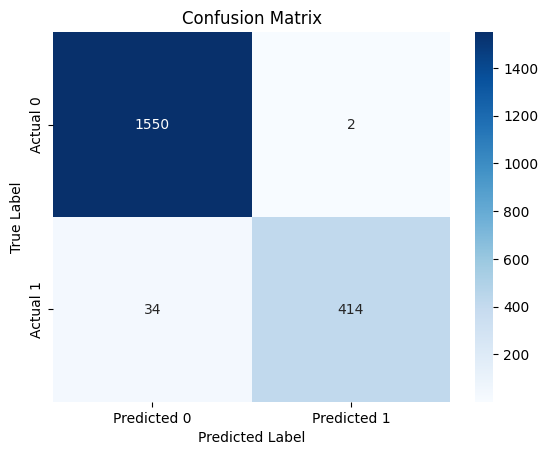

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

(0.0, 1.0)

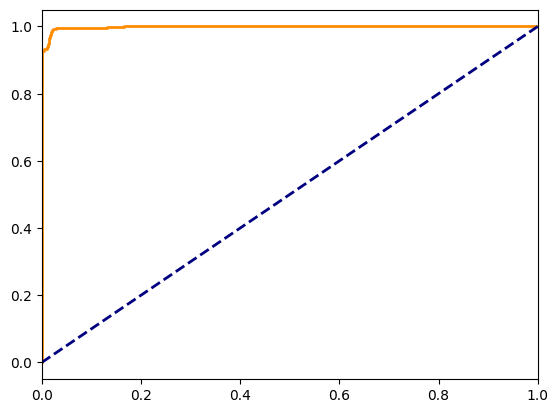

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for the positive class (fraud)
y_pred_prob = (lstm_preds + cnn_preds) / 2

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random classifier line
plt.xlim([0.0, 1.0])
